In [69]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# EDA

In [10]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [12]:
df['Unnamed: 0']

0        1
1        2
2        3
3        4
4        5
      ... 
195    196
196    197
197    198
198    199
199    200
Name: Unnamed: 0, Length: 200, dtype: int64

In [13]:
df.drop(columns=['Unnamed: 0'], inplace= True)

In [14]:
df.columns


Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

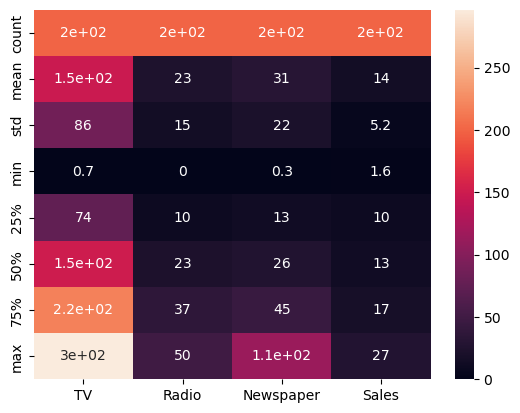

In [46]:
sns.heatmap(df.describe(), annot= True)
plt.show()

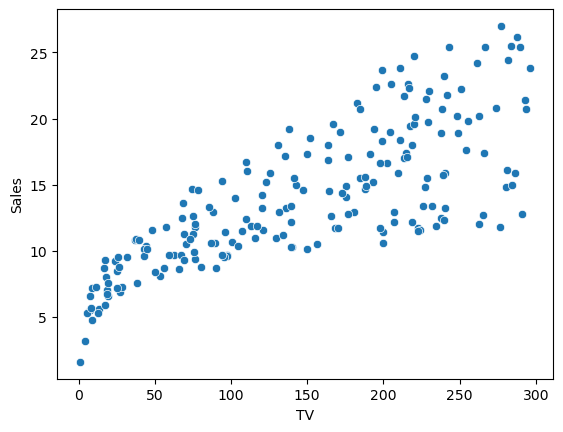

In [34]:
sns.scatterplot(data=df,x=df['TV'],y=df['Sales'])
plt.show()

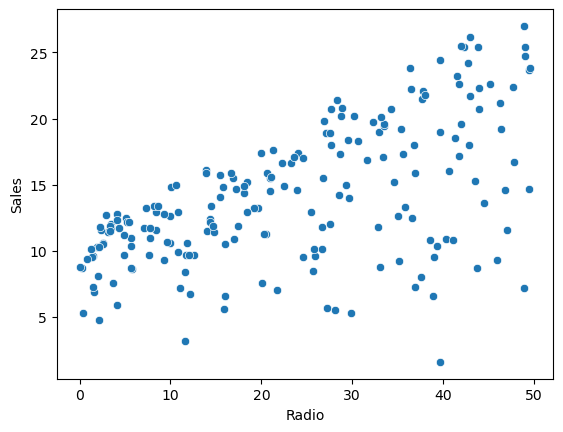

In [35]:
sns.scatterplot(data=df,x=df['Radio'],y=df['Sales'])
plt.show()

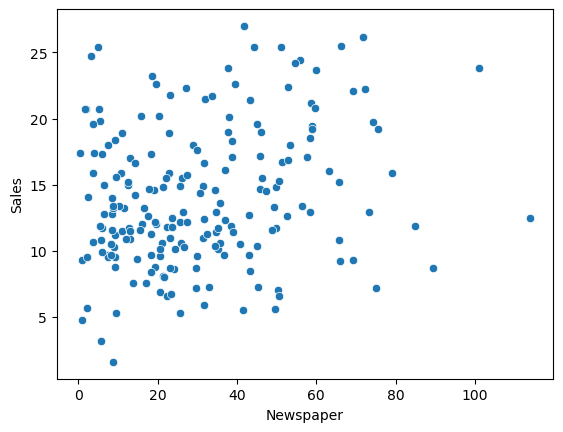

In [38]:
sns.scatterplot(data=df,x=df['Newspaper'],y=df['Sales'])
plt.show()

# Model Building

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = df.drop(columns='Sales', axis = 1)

In [49]:
y = df['Sales']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state = 42 )

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [62]:
model1 = LinearRegression()
model2 = RandomForestRegressor()
model3 = GradientBoostingRegressor()
model4 = AdaBoostRegressor()
model5 = BaggingRegressor()

In [63]:
def model_train(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('R2 Score: ',r2_score(y_test,y_pred))
    print("======================================")
    print('MAE ',mean_absolute_error(y_test,y_pred))
    print("======================================")
    print('MSE',mean_squared_error(y_test,y_pred))
    print("======================================")

# LinearRegression

In [64]:
model_train(model1, X_train, y_train, X_test, y_test)

R2 Score:  0.8935163320163658
MAE  1.4023124989385074
MSE 2.8800237300941918


# RandomForestRegressor

In [65]:
model_train(model2, X_train, y_train, X_test, y_test)

R2 Score:  0.9822214964795606
MAE  0.5577799999999992
MSE 0.4808484999999997


# GradientBoostingRegressor

In [66]:
model_train(model3, X_train, y_train, X_test, y_test)

R2 Score:  0.985040980000576
MAE  0.515863502988575
MSE 0.4045909893329002


# AdaBoostRegressor

In [67]:
model_train(model4, X_train, y_train, X_test, y_test)

R2 Score:  0.9587782098958232
MAE  0.8723790528091644
MSE 1.114910257554591


# BaggingRegressor

In [68]:
model_train(model5, X_train, y_train, X_test, y_test)

R2 Score:  0.9687085530526841
MAE  0.7376
MSE 0.8463279999999999
